In [38]:
%matplotlib inline
import sys 
sys.path.append('../')
import torch
from blurnet.models import AlexNetCifar10
from blurnet.utils import dataloader, GaussianBlur_images
import matplotlib.pyplot as plt

In [31]:
def calc_acc(kernel_size, sigma):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0], data[1].to(device)
            # making images blurred
            images = GaussianBlur_images(images, kernel_size, sigma).to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    return correct / total

In [36]:
def test_each_class(kernel_size, sigma):
    # Accuracy for each class
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            # making images blurred
            images = GaussianBlur_images(images.cpu(), kernel_size, sigma).to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(labels.size(0)):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1


    for i in range(10):
        print('Accuracy of %5s : %2d %%' % (
            classes[i], 100 * class_correct[i] / class_total[i]))

In [120]:
MODEL =  'normal_b64.pth'
MODEL_PATH = '../logs/params/' + MODEL

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = AlexNetCifar10().to(device)
net.load_state_dict(torch.load(MODEL_PATH))
net.eval()

# record accuracies with different blurs
normal = []
normal.append(calc_acc((1,1), 0))
normal.append(calc_acc((3,3), 1))
normal.append(calc_acc((5,5), 1.5))
normal.append(calc_acc((7,7), 2))
normal.append(calc_acc((9,9), 3))
normal.append(calc_acc((13,13), 4))

In [121]:
MODEL =  's1_k3-3.pth'
MODEL_PATH = '../logs/params/' + MODEL

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = AlexNetCifar10().to(device)
net.load_state_dict(torch.load(MODEL_PATH))
net.eval()

# record accuracies with different blurs
k3 = []
k3.append(calc_acc((1,1), 0))
k3.append(calc_acc((3,3), 1))
k3.append(calc_acc((5,5), 1.5))
k3.append(calc_acc((7,7), 2))
k3.append(calc_acc((9,9), 3))
k3.append(calc_acc((13,13), 4))

In [122]:
MODEL =  's1.5_k5-5.pth'
MODEL_PATH = '../logs/params/' + MODEL

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = AlexNetCifar10().to(device)
net.load_state_dict(torch.load(MODEL_PATH))
net.eval()

# record accuracies with different blurs
k5 = []
k5.append(calc_acc((1,1), 0))
k5.append(calc_acc((3,3), 1))
k5.append(calc_acc((5,5), 1.5))
k5.append(calc_acc((7,7), 2))
k5.append(calc_acc((9,9), 3))
k5.append(calc_acc((13,13), 4))

In [123]:
MODEL =  's2_k7-7.pth'
MODEL_PATH = '../logs/params/' + MODEL

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = AlexNetCifar10().to(device)
net.load_state_dict(torch.load(MODEL_PATH))
net.eval()

# record accuracies with different blurs
k7 = []
k7.append(calc_acc((1,1), 0))
k7.append(calc_acc((3,3), 1))
k7.append(calc_acc((5,5), 1.5))
k7.append(calc_acc((7,7), 2))
k7.append(calc_acc((9,9), 3))
k7.append(calc_acc((13,13), 4))

In [124]:
MODEL =  's3_k9-9.pth'
MODEL_PATH = '../logs/params/' + MODEL

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = AlexNetCifar10().to(device)
net.load_state_dict(torch.load(MODEL_PATH))
net.eval()

# record accuracies with different blurs
k9 = []
k9.append(calc_acc((1,1), 0))
k9.append(calc_acc((3,3), 1))
k9.append(calc_acc((5,5), 1.5))
k9.append(calc_acc((7,7), 2))
k9.append(calc_acc((9,9), 3))
k9.append(calc_acc((13,13), 4))

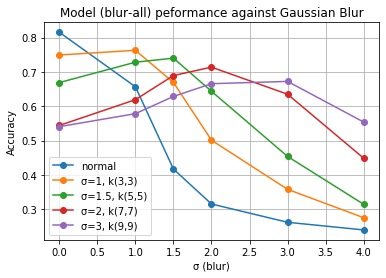

In [125]:
x = [0, 1, 1.5, 2, 3, 4]
fig, ax = plt.subplots()
plt.title("Model (blur-all) peformance against Gaussian Blur")
ax.plot(x, normal, label='normal', marker="o")
ax.plot(x, k3, label='σ=1, k(3,3)', marker="o")
ax.plot(x, k5, label='σ=1.5, k(5,5)', marker="o")
ax.plot(x, k7, label='σ=2, k(7,7)', marker="o")
ax.plot(x, k9, label='σ=3, k(9,9)', marker="o")
ax.set_xlabel('σ (blur)')
ax.set_ylabel('Accuracy')
ax.legend()
ax.grid(True)
fig.show()
fig.savefig('blur-all_acc.png')

In [126]:
MODEL =  's1_k3-3_noblur_from25.pth'
MODEL_PATH = '../logs/params/' + MODEL

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = AlexNetCifar10().to(device)
net.load_state_dict(torch.load(MODEL_PATH))
net.eval()

# record accuracies with different blurs
k3 = []
k3.append(calc_acc((1,1), 0))
k3.append(calc_acc((3,3), 1))
k3.append(calc_acc((5,5), 1.5))
k3.append(calc_acc((7,7), 2))
k3.append(calc_acc((9,9), 3))
k3.append(calc_acc((13,13), 4))

In [127]:
MODEL =  's1.5_k5-5_noblur_from25.pth'
MODEL_PATH = '../logs/params/' + MODEL

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = AlexNetCifar10().to(device)
net.load_state_dict(torch.load(MODEL_PATH))
net.eval()

# record accuracies with different blurs
k5 = []
k5.append(calc_acc((1,1), 0))
k5.append(calc_acc((3,3), 1))
k5.append(calc_acc((5,5), 1.5))
k5.append(calc_acc((7,7), 2))
k5.append(calc_acc((9,9), 3))
k5.append(calc_acc((13,13), 4))

In [128]:
MODEL =  's2_k7-7_noblur_from25.pth'
MODEL_PATH = '../logs/params/' + MODEL

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = AlexNetCifar10().to(device)
net.load_state_dict(torch.load(MODEL_PATH))
net.eval()

# record accuracies with different blurs
k7 = []
k7.append(calc_acc((1,1), 0))
k7.append(calc_acc((3,3), 1))
k7.append(calc_acc((5,5), 1.5))
k7.append(calc_acc((7,7), 2))
k7.append(calc_acc((9,9), 3))
k7.append(calc_acc((13,13), 4))

In [129]:
MODEL =  's3_k9-9_noblur_from25.pth'
MODEL_PATH = '../logs/params/' + MODEL

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = AlexNetCifar10().to(device)
net.load_state_dict(torch.load(MODEL_PATH))
net.eval()

# record accuracies with different blurs
k9 = []
k9.append(calc_acc((1,1), 0))
k9.append(calc_acc((3,3), 1))
k9.append(calc_acc((5,5), 1.5))
k9.append(calc_acc((7,7), 2))
k9.append(calc_acc((9,9), 3))
k9.append(calc_acc((13,13), 4))

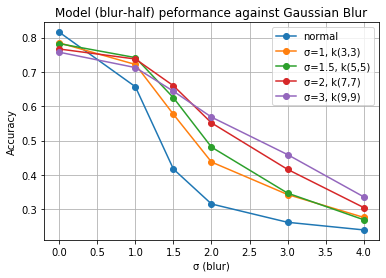

In [130]:
x = [0, 1, 1.5, 2, 3, 4]
fig, ax = plt.subplots()
plt.title("Model (blur-half) peformance against Gaussian Blur")
ax.plot(x, normal, label='normal', marker="o")
ax.plot(x, k3, label='σ=1, k(3,3)', marker="o")
ax.plot(x, k5, label='σ=1.5, k(5,5)', marker="o")
ax.plot(x, k7, label='σ=2, k(7,7)', marker="o")
ax.plot(x, k9, label='σ=3, k(9,9)', marker="o")
ax.set_xlabel('σ (blur)')
ax.set_ylabel('Accuracy')
ax.legend()
ax.grid(True)
fig.show()
fig.savefig('blur-half_acc.png')

In [109]:
MODEL =  'step_e50.pth'
MODEL_PATH = '../logs/params/' + MODEL

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = AlexNetCifar10().to(device)
net.load_state_dict(torch.load(MODEL_PATH))
net.eval()

# record accuracies with different blurs
step = []
step.append(calc_acc((1,1), 0))
step.append(calc_acc((3,3), 1))
step.append(calc_acc((5,5), 1.5))
step.append(calc_acc((7,7), 2))
step.append(calc_acc((9,9), 3))
step.append(calc_acc((13,13), 4))

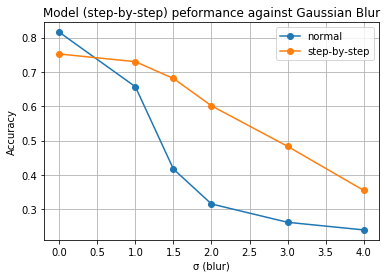

In [119]:
x = [0, 1, 1.5, 2, 3, 4]
fig, ax = plt.subplots()
plt.title("Model (step-by-step) peformance against Gaussian Blur")
ax.plot(x, normal, label='normal', marker="o")
ax.plot(x, step, label='step-by-step', marker="o")
ax.set_xlabel('σ (blur)')
ax.set_ylabel('Accuracy')
ax.legend()
ax.grid(True)
fig.show()
fig.savefig('blur-step_acc.png')

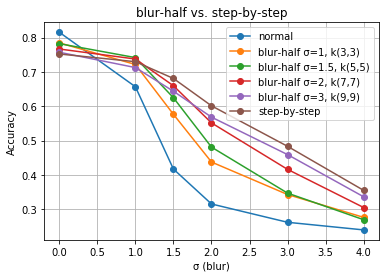

In [118]:
x = [0, 1, 1.5, 2, 3, 4]
fig, ax = plt.subplots()
plt.title("blur-half vs. step-by-step")
ax.plot(x, normal, label='normal', marker="o")
ax.plot(x, k3, label='blur-half σ=1, k(3,3)', marker="o")
ax.plot(x, k5, label='blur-half σ=1.5, k(5,5)', marker="o")
ax.plot(x, k7, label='blur-half σ=2, k(7,7)', marker="o")
ax.plot(x, k9, label='blur-half σ=3, k(9,9)', marker="o")
ax.plot(x, step, label='step-by-step', marker="o")
ax.set_xlabel('σ (blur)')
ax.set_ylabel('Accuracy')
ax.legend()
ax.grid(True)
fig.show()
fig.savefig('half_step_acc_comparison.png')